In [99]:
import numpy as np
from open3d import *
import matplotlib.pyplot as plt

point_cloud = io.read_point_cloud("../assets/Truck/sparse_pc.ply") # Read point cloud
point_cloud_array = np.asarray(point_cloud.points)
point_cloud_colors = np.asarray(point_cloud.colors)

# add one last 0 to the point_cloud array
point_cloud_array_homogeneous = np.hstack((point_cloud_array, np.ones((point_cloud_array.shape[0], 1))))
print(point_cloud_array_homogeneous.shape)


(136614, 4)


(3, 4)


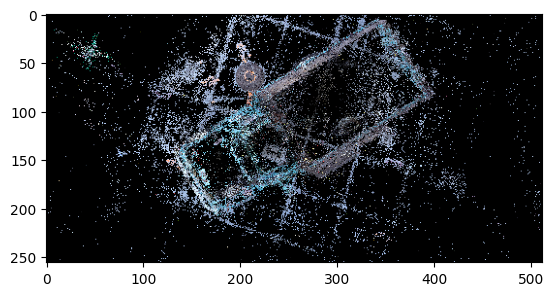

In [106]:
# We follow the convention K = [[fx, 0, cx], [0, fy, cy], [0, 0, 1]]
# Rt = [[R | t], [0, 0, 0, 1]]
# where the final projection matrix is P = K * Rt

K = np.array([[256.0, 0.0, 0], [0.0, 512.0, 0], [0.0, 0.0, 1.0]])
Rt = np.array([[-1.0, 0.0, 0.0, -5], 
               [0.0, -1.0, 0.0, -2], 
               [0.0, 0.0, 1.0, -10]])

P = np.dot(K, Rt)

print(P.shape)

point_2d = np.dot(P, point_cloud_array_homogeneous.T).T
point_2d = point_2d / point_2d[:, 2].reshape(-1, 1)
normalize_0_1 = (point_2d[:, :2]) / K[0,0]
# remove points that are outside the image

mask = (normalize_0_1[:, 0] >= 0) & (normalize_0_1[:, 0] <= 1) & (normalize_0_1[:, 1] >= 0) & (normalize_0_1[:, 1] <= 1)
normalize_0_1 = normalize_0_1[mask]
colors = point_cloud_colors[mask]

# plot this points on a 256x256 image
image = np.zeros((256, 512, 3), dtype=np.uint8)

x = (normalize_0_1[:,0] * 511).astype(int)
y = (normalize_0_1[:,1] * 256).astype(int)

image[y, x] = colors[:, :3] * 255

plt.imshow(image)

In [36]:
# simple examples

simple_array = np.array([[100, 100, 100], [0,0,100], [100, 0, 100], [0, 100, 100]])
simple_array_homogeneous = np.hstack((simple_array, np.ones((simple_array.shape[0], 1))))


In [39]:
point_2d = np.dot(P, simple_array_homogeneous.T).T
point_2d = point_2d / point_2d[:, 2].reshape(-1, 1)
point_2d

array([[10., 10.,  1.],
       [ 0.,  0.,  1.],
       [10.,  0.,  1.],
       [ 0., 10.,  1.]])

In [41]:
# normalize interval from -1 to 1
normalize_2d = (point_2d[:, :2] - (K[0,0]/2)) / (K[0,0]/2)
normalize_2d   

array([[ 1.,  1.],
       [-1., -1.],
       [ 1., -1.],
       [-1.,  1.]])

In [44]:
normalize_0_1 = (point_2d[:, :2]) / K[0,0]
normalize_0_1

array([[1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.]])

In [42]:
# plot this points on a 256x256 image
image = np.zeros((256, 256, 3), dtype=np.uint8)
    

In [52]:
x = (normalize_0_1[:,0] * 255).astype(int)
y = (normalize_0_1[:,1] * 255).astype(int)

In [53]:
image[y, x] = (255, 255, 255)

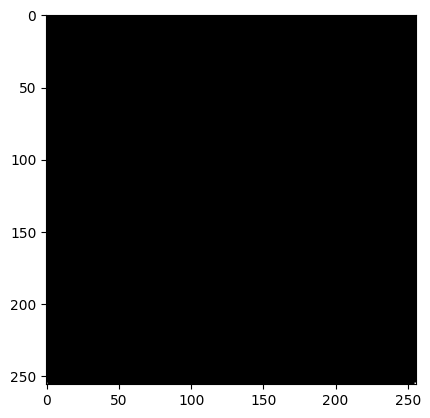

In [54]:
plt.imshow(image)